In [ ]:
YOLOv8 (оригинальный YOLO) - 80 классов:
python
# COCO dataset (80 классов)
classes = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [ ]:
YOLOS - 91 класс:
python
# COCO 2017 dataset (91 класс)
classes = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush',
    # ДОПОЛНИТЕЛЬНЫЕ КЛАССЫ YOLOS:
    'N/A', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 
    'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'
]

In [ ]:
Доступные YOLO модели в Hugging Face:
python
# YOLOS (YOLO + Transformer)
MODELS = {
    "tiny": "hustvl/yolos-tiny",
    "small": "hustvl/yolos-small", 
    "base": "hustvl/yolos-base",
    "large": "hustvl/yolos-large"
}

# Классический YOLOv8 (через ultralytics)
YOLOV8_MODELS = {
    "nano": "yolov8n.pt",
    "small": "yolov8s.pt", 
    "medium": "yolov8m.pt",
    "large": "yolov8l.pt",
    "xlarge": "yolov8x.pt"
}

In [1]:
# YOLO через Transformers (новый подход)

from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch

# 1. Загружаем модель и процессор (новый подход)
processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")
model = YolosForObjectDetection.from_pretrained("hustvl/yolos-tiny")

# 2. Загружаем изображение
image = Image.open("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")

# 3. Обрабатываем и делаем детекцию
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# 4. Получаем результаты
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# 5. Выводим результаты
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    print(f"Обнаружен {model.config.id2label[label.item()]} с уверенностью {round(score.item(), 3)}")

2025-11-01 09:51:10.763076: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-01 09:51:10.805017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 09:51:12.308030: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

Обнаружен book с уверенностью 0.928
Обнаружен person с уверенностью 0.999
Обнаружен book с уверенностью 0.915
Обнаружен book с уверенностью 0.904
Обнаружен cup с уверенностью 0.987
Обнаружен laptop с уверенностью 0.993
Обнаружен dining table с уверенностью 0.961
Обнаружен book с уверенностью 0.901
Обнаружен book с уверенностью 0.905
Обнаружен book с уверенностью 0.955
Обнаружен book с уверенностью 0.903
Обнаружен potted plant с уверенностью 0.941


In [7]:
#Вариант 3: YOLO через Transformers с AutoClasses

from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image
import torch

# Универсальный подход для любой модели детекции
processor = AutoImageProcessor.from_pretrained("hustvl/yolos-small")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-small")

image = Image.open("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_object_detection(outputs, target_sizes=torch.tensor([image.size[::-1]]))[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.92:
        print(f"✅ {model.config.id2label[label.item()]}: {score:.3f}")

✅ book: 0.941
✅ book: 0.927
✅ laptop: 0.998
✅ potted plant: 0.993
✅ book: 0.949
✅ book: 0.942
✅ book: 0.964
✅ book: 0.929
✅ cell phone: 0.977
✅ book: 0.962
✅ book: 0.948
✅ person: 1.000
✅ bicycle: 0.983
✅ cup: 0.961
✅ book: 0.942
✅ dining table: 0.976
✅ book: 0.950


🎯 Найдено объектов: 27
   1. book - уверенность: 0.928
   6. person - уверенность: 0.999
   11. cup - уверенность: 0.987
   13. laptop - уверенность: 0.993
   16. dining table - уверенность: 0.961
   20. book - уверенность: 0.955
   26. potted plant - уверенность: 0.941


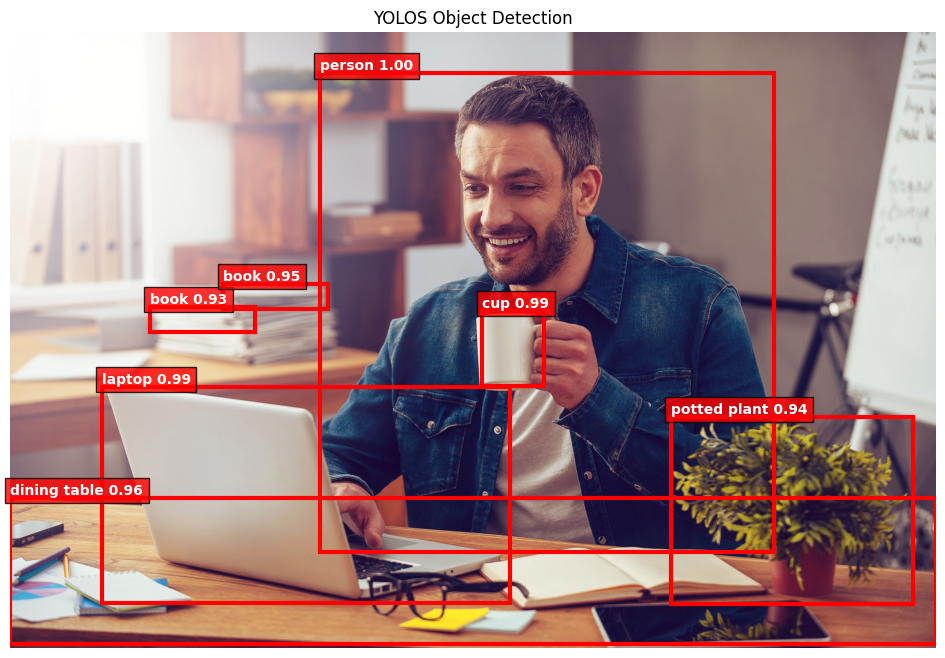

In [5]:
# YOLO через Transformers

from transformers import AutoImageProcessor, AutoModelForObjectDetection
from PIL import Image
import torch
import matplotlib.pyplot as plt

def yolo_via_transformers(image_path):
    """YOLO через Hugging Face Transformers"""
    
    # Загружаем YOLOS модель (YOLO + Transformer)
    processor = AutoImageProcessor.from_pretrained("hustvl/yolos-tiny")
    model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-tiny")
    
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Пост-обработка результатов
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]
    
    # Визуализация
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    print(f"🎯 Найдено объектов: {len(results['boxes'])}")
    
    for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
        if score > 0.92:
            x1, y1, x2, y2 = box.tolist()
            
            # Рисуем bounding box
            plt.gca().add_patch(plt.Rectangle(
                (x1, y1), x2-x1, y2-y1, 
                fill=False, edgecolor='red', linewidth=3
            ))
            
            # Подпись
            label_name = model.config.id2label[label.item()]
            plt.text(x1, y1-15, f"{label_name} {score:.2f}", 
                    bbox=dict(facecolor='red', alpha=0.8), 
                    fontweight='bold', color='white', fontsize=10)
            
            print(f"   {i+1}. {label_name} - уверенность: {score:.3f}")
    
    plt.axis('off')
    plt.title("YOLOS Object Detection")
    plt.show()

# Запуск
yolo_via_transformers("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")

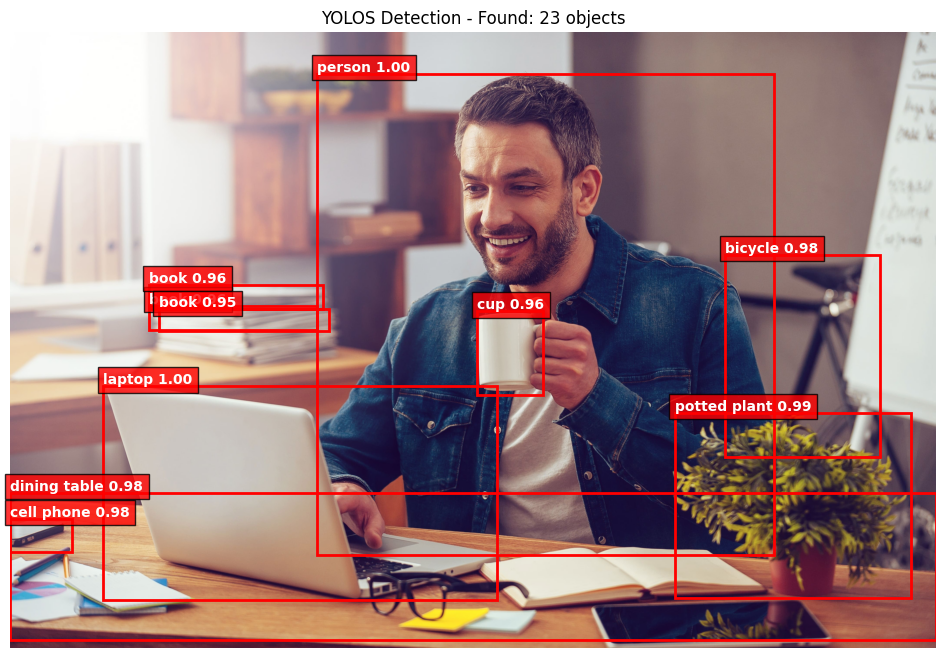

🎯 Найдено объектов: 23
   4. laptop (0.998)
   5. potted plant (0.993)
   10. book (0.964)
   12. cell phone (0.977)
   13. book (0.962)
   16. person (1.000)
   17. bicycle (0.983)
   19. cup (0.961)
   21. dining table (0.976)
   22. book (0.950)


In [11]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
import torch

def yolo_transformers_detection(image_path):
    """YOLO через Transformers с визуализацией"""
    
    # 1. Загрузка модели
    processor = YolosImageProcessor.from_pretrained("hustvl/yolos-small")
    model = YolosForObjectDetection.from_pretrained("hustvl/yolos-small")
    
    # 2. Загрузка изображения
    image = Image.open(image_path)
    
    # 3. Детекция
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    # 4. Пост-обработка
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)[0]
    
    # 5. Визуализация
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        if score > 0.95:
            x1, y1, x2, y2 = box.tolist()
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                            fill=False, edgecolor='red', linewidth=2))
            plt.text(x1, y1-10, f"{model.config.id2label[label.item()]} {score:.2f}", 
                    bbox=dict(facecolor='red', alpha=0.8), fontweight='bold', color='white')
    
    plt.axis('off')
    plt.title(f"YOLOS Detection - Found: {len(results['boxes'])} objects")
    plt.show()
    
    # 6. Текстовый вывод
    print(f"🎯 Найдено объектов: {len(results['boxes'])}")
    for i, (score, label) in enumerate(zip(results["scores"], results["labels"])):
        if score > 0.95:
            print(f"   {i+1}. {model.config.id2label[label.item()]} ({score:.3f})")

# Запуск
yolo_transformers_detection("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")